# Motion Analysis
In this example, you'll analyze the 1-D motion of an object. Don't be afraid to run code without knowing what every line does. A great way to learn is to:
- run some code
- see what it does
- edit it
- see what changed

Programmers often begin with a working program, then edit/modify it to do what they want. 

In [1]:
# First, we'll "import" the software packages needed.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)

# Starting a line with a hashtag tells the program not to read the line.
# That way we can write "comments" to humans trying to figure out what the code does.
# Blank lines don't do anything either, but they can make the code easier to read.

## Raw data

In [2]:
# Whenever you type "something =" it defines a new variable, "something", 
# and sets it equal to whatever follows the equals sign. That could be a number, 
# another variable, or in this case an entire table of numbers.

# enter raw data
data = pd.DataFrame.from_items([
        ('time (s)', [0,1,2,3]), 
        ('position (m)', [0,2,4,6])
        ])
# display data table
data

,time (s),position (m)
0,0,0
1,1,2
2,2,4
3,3,6


## Plotting the data

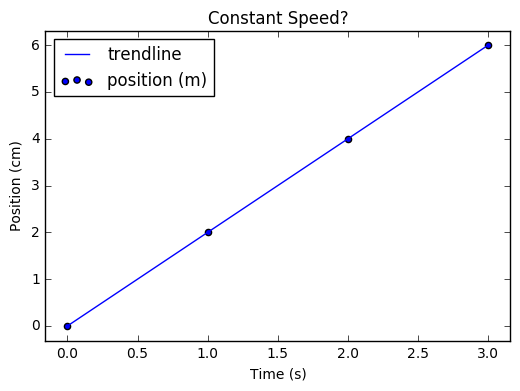

In [3]:
# set variables = data['column label']
time = data['time (s)']
pos = data['position (m)']

# Uncomment the next line to make it look like a graph from xkcd.com
# plt.xkcd()
# to make normal-looking plots again execute:
# mpl.rcParams.update(inline_rc)

# this makes a scatterplot of the data
# plt.scatter(x values, y values)
plt.scatter(time, pos)
plt.title("Constant Speed?")
plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")
plt.autoscale(tight=True)

# calculate a trendline equation
# np.polyfit( x values, y values, polynomial order)
trend = np.polyfit(time, pos, 1)

# plot trendline
# plt.plot(x values, y values, other parameters)
plt.plot(time, np.poly1d(trend)(time), label='trendline')
plt.legend(loc='upper left')

In [4]:
# display the trendline's coefficients (slope, y-int)
trend

array([ 2.,  0.])

## Calculate and plot velocity

In [5]:
# create a new empty column
data['velocity (m/s)'] = ''
data

,time (s),position (m),velocity (m/s)
0,0,0,
1,1,2,
2,2,4,
3,3,6,


In [6]:
# np.diff() calculates the difference between a value and the one after it
vel = np.diff(pos) / np.diff(time)

# fill the velocity column with values from the formula
data['velocity (m/s)'] = pd.DataFrame.from_items([('', vel)])

# display the data table
data

,time (s),position (m),velocity (m/s)
0,0,0,2.0
1,1,2,2.0
2,2,4,2.0
3,3,6,NaN


In [7]:
# That last velocity value will cause problems for further coding
# Make a new table using only rows 0 through 2
data2 = data.loc[0:2,['time (s)', 'velocity (m/s)']]
data2

,time (s),velocity (m/s)
0,0,2.0
1,1,2.0
2,2,2.0


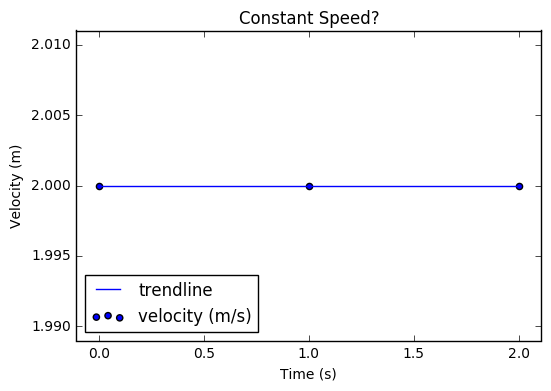

In [8]:
# set new variables to plot
time2 = data2['time (s)']
vel2 = data2['velocity (m/s)']


# plot data just like before
plt.scatter(time2, vel2)
plt.title("Constant Speed?")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m)")
plt.autoscale(tight=True)

# calculate trendline equation like before
trend2 = np.polyfit(time2, vel2, 1)

# plot trendline like before
plt.plot(time2, np.poly1d(trend2)(time2), label='trendline')
plt.legend(loc='lower left')

In [9]:
# display the trendline's coefficients (slope, y-int)
trend2

array([  1.98602732e-16,   2.00000000e+00])

# Part Two
Choose one of the following:
- Mess with the data: edit the original raw data to add more data points and vary them slightly to make it appear like realistic measurements of constant speed motion.
- Constant a: edit/add to the raw data to represent an object moving with constant acceleration.
- More math: create new cells below and add an "acceleration" collumn to the data table, then plot it.